In [2]:
#Deploying machine learning model using streamlit

In [3]:
#importing the libraries that we will need
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Admission_Predict.csv') #reading our dataset
df.head() # checking the top 5 rows of our data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isnull().sum() #checking for null values in our data 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.describe() #checking various values such as mean, median of different columnss and so on

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


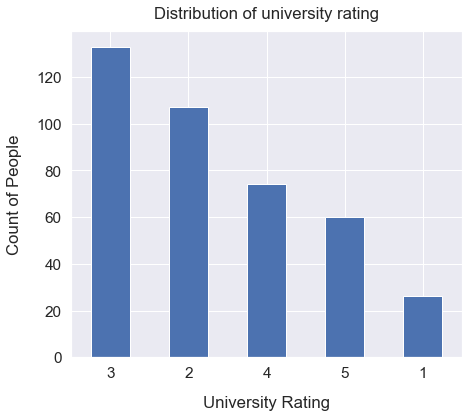

In [6]:
#This plot shows us the distribution of the number of entries for each university rating in the University Ratings column. 
#As we can see most of the universities in this column have a rating of 3
sns.set(font_scale=1.4)
df['University Rating'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("University Rating", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Distribution of university rating", y=1.02);

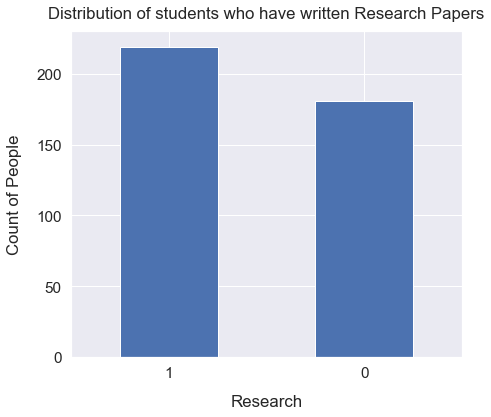

In [7]:
#The below plot shows us how many people in our data have written a research paper.
sns.set(font_scale=1.4)
df['Research'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Research", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Distribution of students who have written Research Papers", y=1.02);

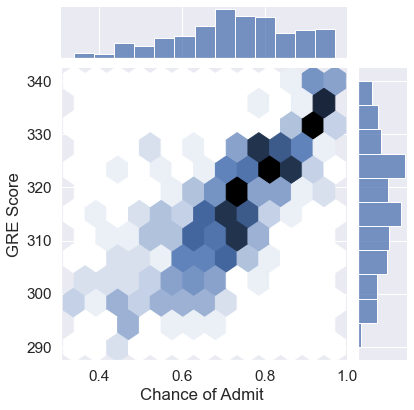

In [8]:
#distribution of GRE scores versus the chances of getting admitted into a particular program
sns.jointplot(data=df, x="Chance of Admit ", y="GRE Score", kind="hex")

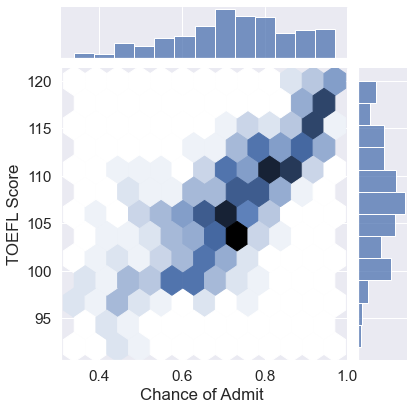

In [9]:
#distribution of TOEFL scores versus the chances of getting admitted into a particular program
sns.jointplot(data=df, x="Chance of Admit ", y="TOEFL Score", kind="hex")

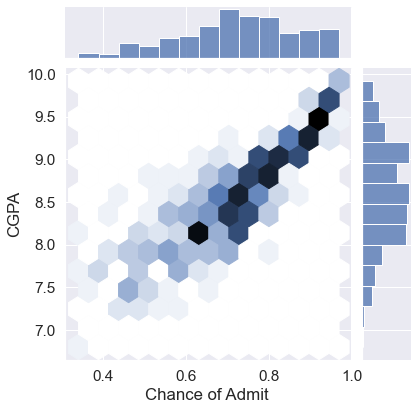

In [10]:
#distribution of CGPA scores versus the chances of getting admitted into a particular program
sns.jointplot(data=df, x="Chance of Admit ", y="CGPA", kind="hex")

In [11]:
#importing the libraries that we will use for making our model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics


X = df[['CGPA','GRE Score','TOEFL Score','Research','University Rating']] #columns that we will use as our features
Y = df[['Chance of Admit ']] #our output 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2) #splitting our data into training and testing set


In [12]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
pred = reg.predict(X_test)
mse=metrics.mean_squared_error(Y_test,pred)
print("Mean square error is=",mse)

Mean square error is= 0.005115926455561129


In [13]:
# testing the model wwith user input from testing set
user_input = [[9.54,334,116,1,4]] 
user_pred = reg.predict(user_input)
print("predict probablitiy=",(user_pred.flatten()*100).astype(float))

predict probablitiy= [92.27656667]


In [14]:
# testing the model wwith user input from testing set
user_input = [[8.5,300,90,1,4]] 
user_pred = reg.predict(user_input)
print("predict probablitiy=",(user_pred.flatten()*100).astype(float))

predict probablitiy= [67.19114987]


In [15]:
# testing the model wwith user input from testing set
user_input = [[9.5,320,80,1,4]] 
user_pred = reg.predict(user_input)
print("predict probablitiy=",(user_pred.flatten()*100).astype(float))

predict probablitiy= [83.13025196]


In [16]:
# testing the model wwith user input from testing set
user_input = [[8.77,244,113,0,3]] 
user_pred = reg.predict(user_input)
print("predict probablitiy=",(user_pred.flatten()*100).astype(float))

predict probablitiy= [59.99906995]


In [24]:
import pickle
pickle.dump(reg,open('new_model.pkl','wb')) #saving our model in .pkl file

In [16]:
#loading our libraries
import streamlit as st
import numpy as np
import string
import pickle

#loading our model for future use
model = pickle.load(open('new_model.pkl','rb'))